In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_import_2018 = pd.read_excel('DATA/Import/Import-2018.xlsx')

In [3]:
df_import_2019 = pd.read_excel('DATA/Import/Import-2019.xlsx')

In [4]:
df_import_2020 = pd.read_excel('DATA/Import/Import-Janar-Dhjetor-2020.xlsx')

In [5]:
df_import_2021 = pd.read_excel('DATA/Import/Import-Janar-Shkurt-2021.xlsx')

In [6]:
import_df = pd.concat([df_import_2018,df_import_2019,df_import_2020,df_import_2021],
                      axis=0).reset_index(drop=True)

In [7]:
import_df.drop(['Regjimi','Origjina','Kodi Tarifor','Sasia','Vlera Mallrave','Netweight'],axis=1,inplace=True)

In [8]:
import_df['revenue'] = import_df['Taksa Doganës'] + import_df['Taksa Akcizës'] + import_df['Taksa TVSH-së']

In [9]:
import_df.drop(['Taksa Doganës','Taksa Akcizës','Taksa TVSH-së'],axis=1,inplace=True)

In [10]:
import_df

,VITI,MUAJI,revenue
0,2018,1,55504.44
1,2018,1,202268.57
2,2018,1,2541676.99
3,2018,1,173818.43
4,2018,1,8697.30
...,...,...,...
637739,2021,2,48.33
637740,2021,2,399.23
637741,2021,2,0.00
637742,2021,2,1113.93


In [11]:
import_df[(import_df['MUAJI'] == 1)][import_df['VITI'] == 2018].sum()

<ipython-input-11-e877f897a33f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import_df[(import_df['MUAJI'] == 1)][import_df['VITI'] == 2018].sum()


VITI       25681068.00
MUAJI         12726.00
revenue    62953745.31
dtype: float64

In [12]:
mi_df = import_df.groupby([(import_df['VITI']),(import_df.MUAJI)]).sum()

In [13]:
mi_df.head()

revenue
VITI MUAJI             
2018 1      62953745.31
     2      66958785.41
     3      80449479.50
     4      88911890.04
     5      98208820.93

In [14]:
df = mi_df.reset_index(level=[0,1])

In [15]:
df.head()

,VITI,MUAJI,revenue
0,2018,1,62953745.31
1,2018,2,66958785.41
2,2018,3,80449479.50
3,2018,4,88911890.04
4,2018,5,98208820.93


In [16]:
new_col = df[['VITI','MUAJI']].apply(lambda x : '{}-{}'.format(x[0],x[1]), axis=1)
df.insert(loc=0, column='date', value=new_col)
df.drop(['VITI','MUAJI'],axis=1,inplace=True)

In [17]:
df.head()

,date,revenue
0,2018-1,62953745.31
1,2018-2,66958785.41
2,2018-3,80449479.50
3,2018-4,88911890.04
4,2018-5,98208820.93


---

In [18]:
df_income = df.copy()

In [21]:
df_income['date'] = pd.to_datetime(df_income.date)

In [22]:
df_income.head()

,date,revenue
0,2018-01-01,62953745.31
1,2018-02-01,66958785.41
2,2018-03-01,80449479.50
3,2018-04-01,88911890.04
4,2018-05-01,98208820.93


In [23]:
df_income.date[1]

Timestamp('2018-02-01 00:00:00')

In [24]:
df_income.set_index("date",inplace=True)

In [25]:
df_income.head()

,revenue
date,
2018-01-01,62953745.31
2018-02-01,66958785.41
2018-03-01,80449479.50
2018-04-01,88911890.04
2018-05-01,98208820.93


<AxesSubplot:xlabel='date'>

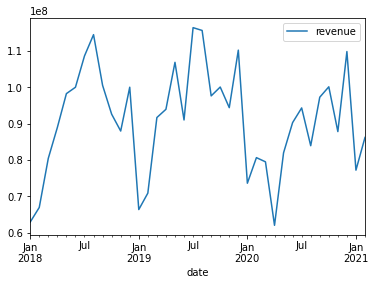

In [26]:
df_income.plot()

## Stationary
means mean,variance and covariance is constant over time.

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

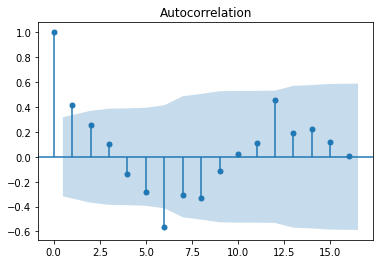

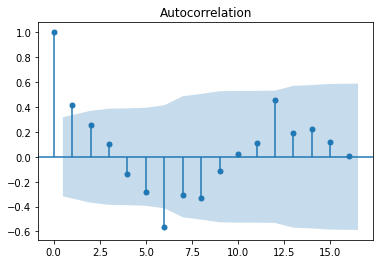

In [34]:
plot_acf(df_income)

### converting series to stationary

In [28]:
df_income.head()

,revenue
date,
2018-01-01,62953745.31
2018-02-01,66958785.41
2018-03-01,80449479.50
2018-04-01,88911890.04
2018-05-01,98208820.93


In [30]:
df_income_diff = df_income.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model

In [32]:
df_income_diff = df_income_diff[1:]
df_income_diff.head()

,revenue
date,
2018-02-01,4005040.10
2018-03-01,13490694.09
2018-04-01,8462410.54
2018-05-01,9296930.89
2018-06-01,1748938.24


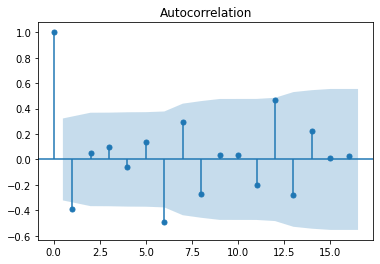

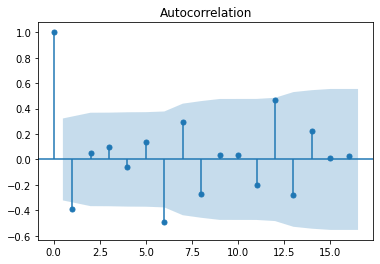

In [35]:
plot_acf(df_income_diff)

<AxesSubplot:xlabel='date'>

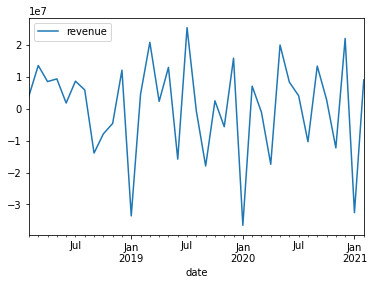

In [36]:
df_income_diff.plot()

In [85]:
X = df_income.values
train = X[0:27] # 30 data as train
test = X[27:] # 8 data as test
predictions = []

In [70]:
test.size

8

In [71]:
train.size

30

## Autoregressive AR MODEL

In [38]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [86]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

/home/durajet/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWar

In [89]:
predictions = model_ar_fit.predict(start=27,end=38)

In [90]:
test

array([[6.20626456e+07],
       [8.19647725e+07],
       [9.02601514e+07],
       [9.42847107e+07],
       [8.39106054e+07],
       [9.72263272e+07],
       [1.00080558e+08],
       [8.77900305e+07],
       [1.09757074e+08],
       [7.72030068e+07],
       [8.61839858e+07]])

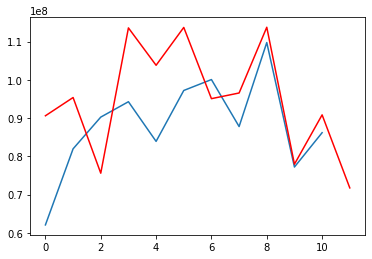

In [91]:
plt.plot(test)
plt.plot(predictions,color='red')

<AxesSubplot:xlabel='date'>

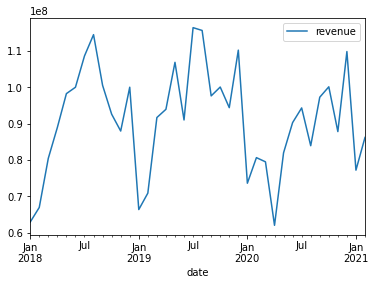

In [60]:
df_income.plot()

## ARIMA MODEL

In [92]:
from statsmodels.tsa.arima_model import ARIMA

In [96]:
#p - periods taken for autoregression model, d - Integrated order,difference , q - periods in moving average model 
model_arima = ARIMA(train,order=(4,1,0))
model_arima_fit = model_arima.fit()

/home/durajet/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [97]:
predictions = model_arima_fit.forecast(steps=8)[0]
predictions

array([81395802.39298686, 75684236.44775663, 79204544.45252654,
       78980887.18298319, 79703586.01728351, 79394254.22709413,
       80767015.07366201, 81076518.96595655])

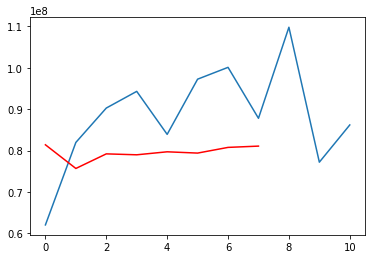

In [98]:
plt.plot(test)
plt.plot(predictions,color='red')

---

In [115]:
from numpy.linalg import inv

X = delta.to_numpy()
S = covValue.to_numpy()
for i in range(1):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

In [116]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

In [117]:
knn = 4
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(delta.to_numpy())
distances, indices = nbrs.kneighbors(delta.to_numpy())

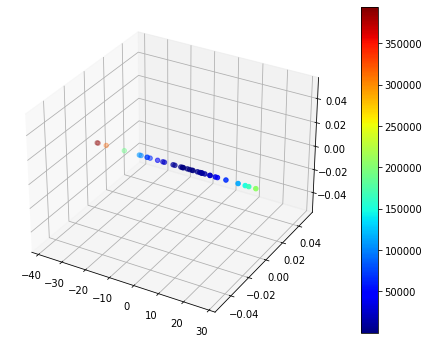

In [120]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.revenue,ys=0,c=anomaly_score,cmap='jet')
fig.colorbar(p)
plt.show()

In [121]:
anom = pd.DataFrame(anomaly_score, index=delta.index, columns=['Anomaly score'])
result = pd.concat((delta,anom), axis=1)
result.nlargest(5,'Anomaly score')

,revenue,Anomaly score
date,,
2019-01-01,-38.085493,394307.971949
2020-01-01,-37.656147,385467.849802
2021-01-01,-34.153862,317099.851292
2020-05-01,27.574050,206689.072548
2020-04-01,-26.417274,189710.958567


<AxesSubplot:xlabel='date'>

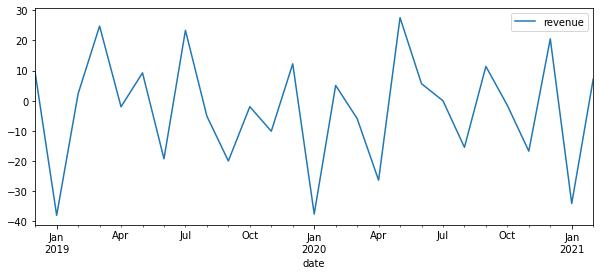

In [126]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(111)
ts = delta[10:37]
ts.plot.line(ax=ax)